In [1]:
import pandas as pd

df = pd.read_csv(r"c:\Users\shuhr\Downloads\HR.csv")
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [2]:
df = df.drop(columns=["EmployeeNumber"])
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

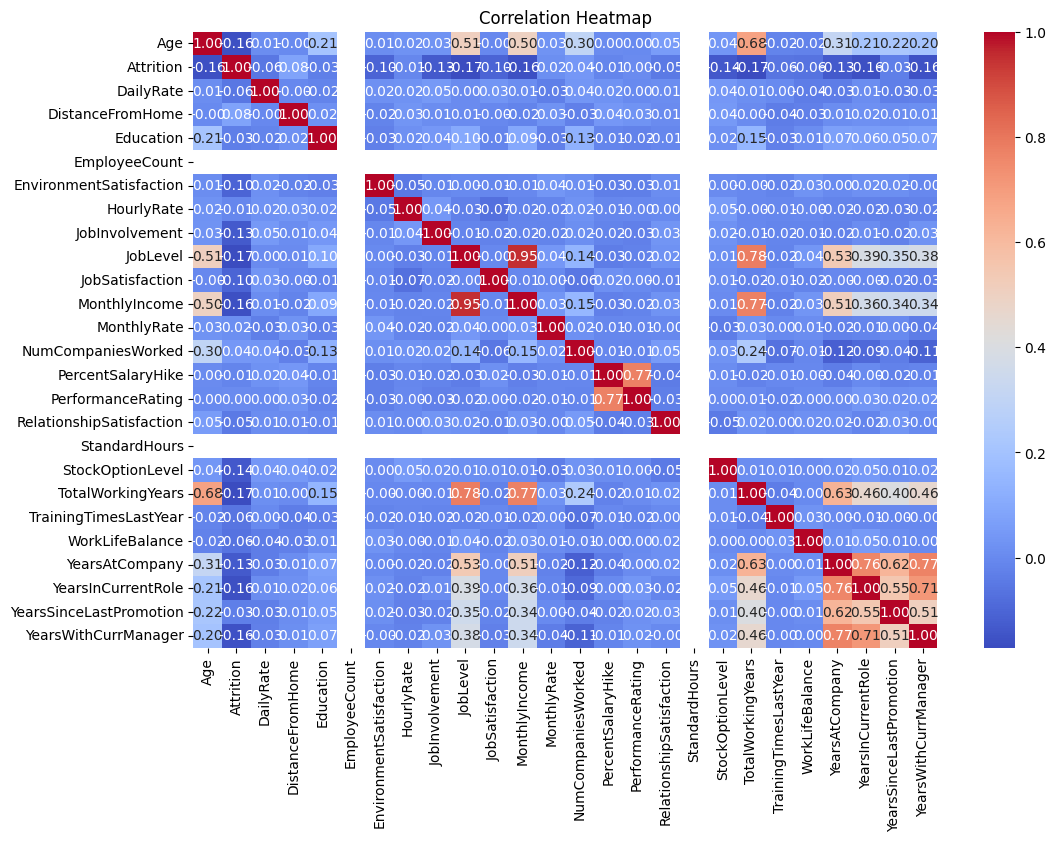

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

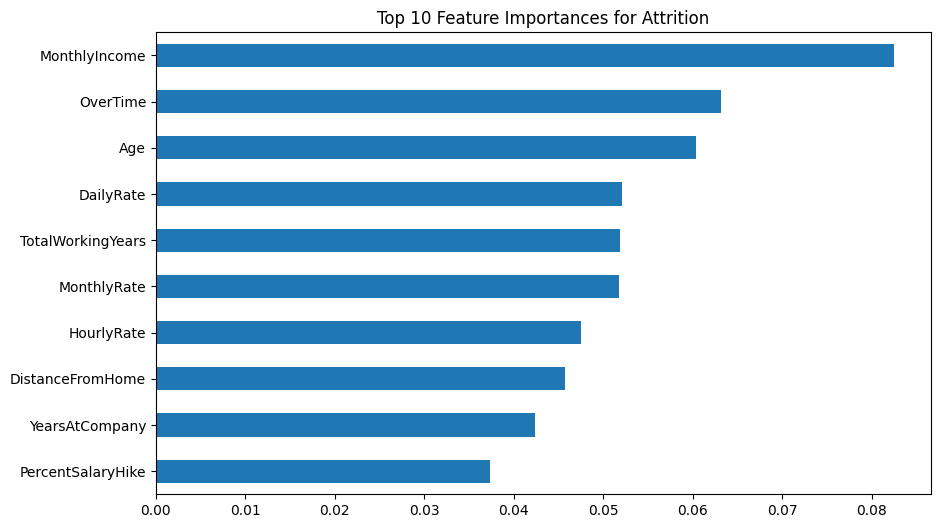

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=["object"]).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(10,6))
importances[:10].plot(kind="barh")
plt.title("Top 10 Feature Importances for Attrition")
plt.gca().invert_yaxis()
plt.show()
